### 
Explore the dataset and fix the data structure and presentation.
Handle all missing values and check for incorrect data entries.
Find a way to categorize expenses into appropriate category like Food, Travel, Shopping etc.
Output the updated data into CSV so that user queries like below can be answered:
What was my food bill in the last month of the date range in the transaction statement?
Compare my monthly travel over past three month of the date range provided in the statement
Am I an impulsive shopper?



###  By
HIMADRI GOSWAMI

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Load Data

In [2]:
df=pd.read_csv('DataScienceCleanStatement.csv', skipinitialspace =True)
df.head(10)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,NaN
2,12/12/2019,MUMUSOGURGAON ...,0,NaN,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,NaN
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
5,13-12-2019,JAIPUR SPACEJAIPUR ...,0,City in India,-360,JASJIT KAUR,Domestic,INR,Sector 9,Jaipur,Rajasthan,India,NaN
6,13-12-2019,CAFE COFFEE DAYHIGHWAY KI ...,0,Cafe company,-286,JASJIT KAUR,Domestic,INR,NaN,NaN,NaN,NaN,NaN
7,14-12-2019,CAFE COFFEE DAYALANKAR PL ...,0,Cafe company,-786,JASJIT KAUR,Domestic,INR,NaN,NaN,NaN,NaN,NaN
8,15-12-2019,LIFE STYLE INTERNATIONAJAIPUR ...,0,NaN,-1698,VIBHORE GOYAL,Domestic,INR,Durgadas Colony,Jaipur,Rajasthan,India,NaN
9,15-12-2019,NEW U 47 JAIPUR ...,0,New York City borough,-1890,VIBHORE GOYAL,Domestic,INR,Jaipur,Jaipur,Rajasthan,India,NaN


In [3]:
df.shape

(1470, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Date                                                                 1470 non-null   object
 1   Description                                                          1470 non-null   object
 2   InternationTransactionAmount                                         1470 non-null   object
 3   Category                                                             962 non-null    object
 4   Amount                                                               1469 non-null   object
 5   TransactionUserName                                                  1470 non-null   object
 6   TransactionType                                                      1470 non-null   object
 7   IsoCurrency    

In [5]:
df.columns

Index(['Date      ',
       'Description                                                        ',
       'InternationTransactionAmount', 'Category', 'Amount',
       'TransactionUserName ', 'TransactionType', 'IsoCurrency', 'Locality',
       'City', 'State', 'Country', 'Unnamed: 12'],
      dtype='object')

In [6]:
df.describe().T

,count,unique,top,freq
Date,1470,408,1/8/2019,13
Description,1470,495,THE ROOM GURGAON ...,122
InternationTransactionAmount,1470,35,0,1436
Category,962,152,Cafe company,147
Amount,1469,990,-50,25
TransactionUserName,1470,7,JASJIT KAUR,755
TransactionType,1470,4,Domestic,1433
IsoCurrency,1470,5,INR,1433
Locality,1302,186,Central Park II,227
City,1270,41,Gurugram,930


In [7]:
df.isnull().sum()

Date                                                                      0
Description                                                               0
InternationTransactionAmount                                              0
Category                                                                508
Amount                                                                    1
TransactionUserName                                                       0
TransactionType                                                           0
IsoCurrency                                                               0
Locality                                                                168
City                                                                    200
State                                                                   225
Country                                                                 163
Unnamed: 12                                                            1466
dtype: int64

## Cleaning the unusual data and filling null values

In [8]:
cl = df['Country'].value_counts().index
cl

Index(['India', 'Singapore', 'United States', 'Malaysia', 'Haryana', 'Delhi',
       'Rajasthan'],
      dtype='object')

In [9]:
filter1 = df['Country'] == 'Haryana'
filter2 = df['Country'] == 'Delhi'
filter3 = df['Country'] == 'Rajasthan'
df['Country'].where((~(filter1 | filter2 | filter3)), 'India', inplace = True )

In [10]:
df.isnull().sum()

Date                                                                      0
Description                                                               0
InternationTransactionAmount                                              0
Category                                                                508
Amount                                                                    1
TransactionUserName                                                       0
TransactionType                                                           0
IsoCurrency                                                               0
Locality                                                                168
City                                                                    200
State                                                                   225
Country                                                                 163
Unnamed: 12                                                            1466
dtype: int64

In [11]:
cl = df['Country'].value_counts().index
cl

Index(['India', 'Singapore', 'United States', 'Malaysia'], dtype='object')

In [12]:
df.Country.value_counts()

India            1264
Singapore          28
United States      12
Malaysia            3
Name: Country, dtype: int64

In [13]:
df.iloc[182,2:8] = ['0','Food','-438.9','VIBHORE GOYAL','Domestic','INR']

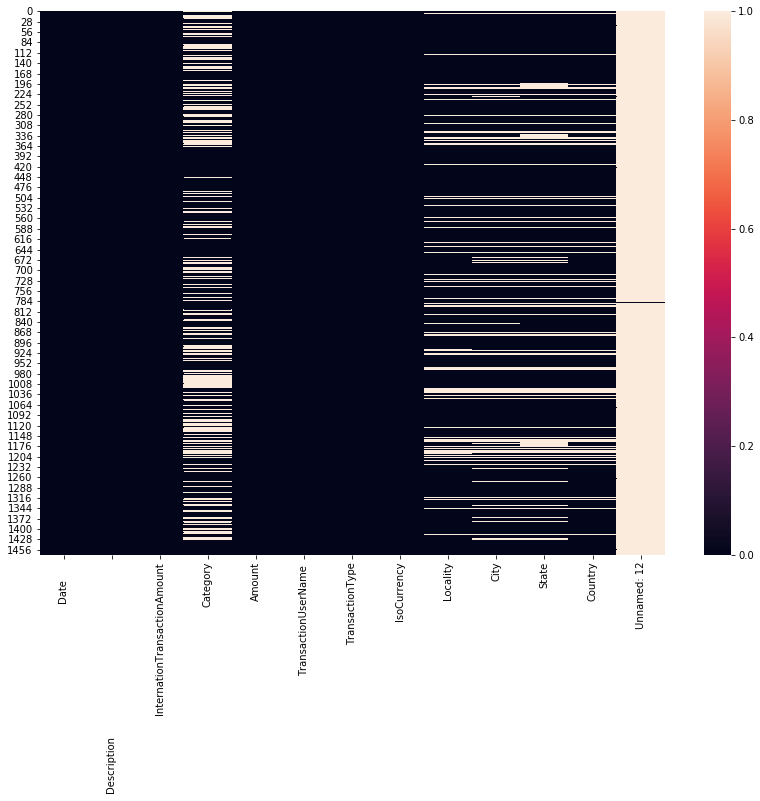

In [14]:
# Draw Heat map to show NULL values
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [15]:
df.drop(['Unnamed: 12'], axis = 1, inplace=True) #Remove unnecessary column

In [16]:
df.isnull().sum()

Date                                                                     0
Description                                                              0
InternationTransactionAmount                                             0
Category                                                               508
Amount                                                                   0
TransactionUserName                                                      0
TransactionType                                                          0
IsoCurrency                                                              0
Locality                                                               168
City                                                                   200
State                                                                  225
Country                                                                163
dtype: int64

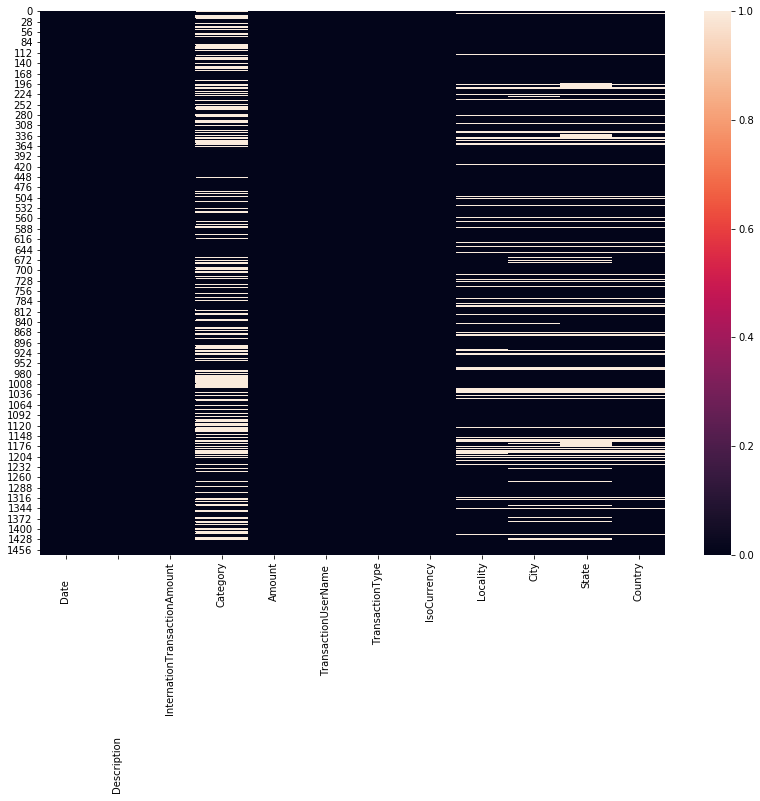

In [17]:
# Draw Heat map to show NULL values
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [18]:
# Remove extra spaces
df.columns=df.columns.str.replace(' ','')

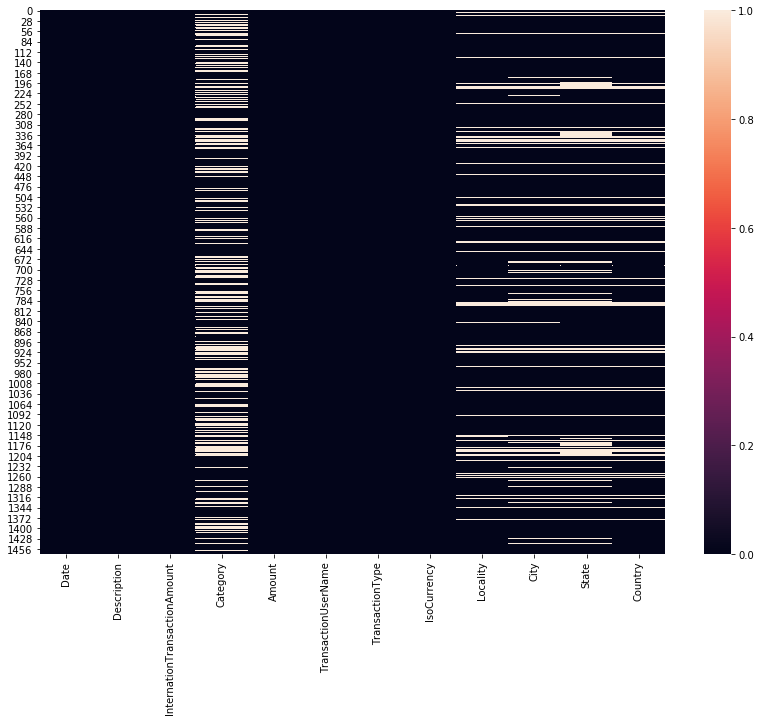

In [19]:
#Heat Map to show NULL values
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [20]:
from sklearn.impute import SimpleImputer
missing_columns = df.iloc[:,:]
imputer = SimpleImputer(strategy='most_frequent')
cols_imputed = imputer.fit_transform(missing_columns)
df.iloc[:,:] = cols_imputed

In [21]:
df.isnull().sum()

Date                            0
Description                     0
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64

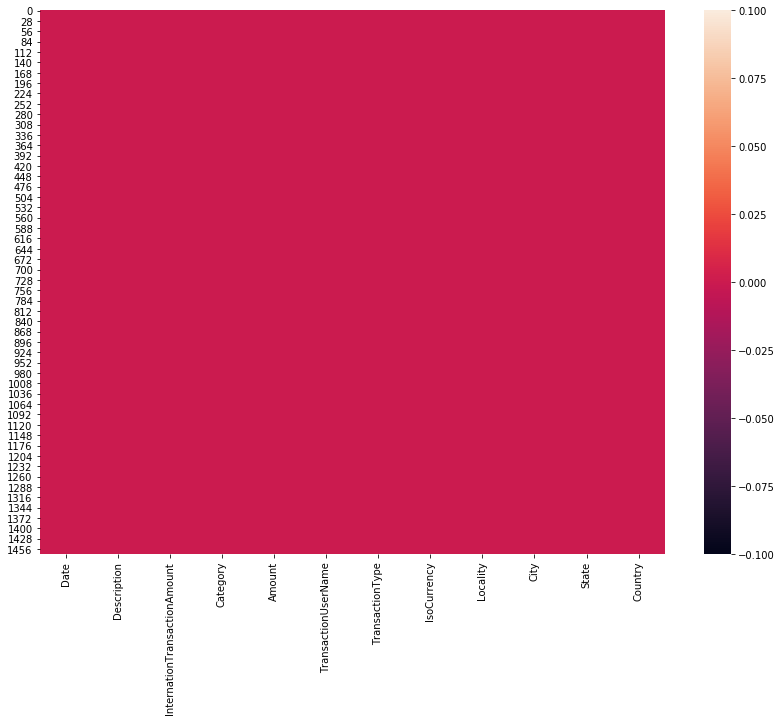

In [22]:
#Heat Map to show NULL values
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [23]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India
2,12/12/2019,MUMUSOGURGAON ...,0,Cafe company,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6/7/2019,KFC SEC 47 SOHNA ROAD GGURGAON ...,0,Fast food restaurant company,-120,VIBHORE GOYAL,Domestic,INR,D1 Block,Gurugram,Haryana,India
1466,7/7/2019,SPICEJET LIMITEDGURGAON ...,0,Airline,-1798,VIBHORE GOYAL,Domestic,INR,Phase III,Gurugram,Haryana,India
1467,7/7/2019,CAFE COFFEE DAYILD TRADE ...,0,Cafe company,-298,VIBHORE GOYAL,Domestic,INR,Sohna Road,Gurugram,Haryana,India
1468,7/7/2019,SHOPPERS STOP LTD GURGAON ...,0,Department store company,-1852,JASJIT KAUR,Domestic,INR,Heritage City,Gurugram,Haryana,India


In [24]:
# Remove spaces before and after.
cols = df.columns
for column in cols:
    x = df[column]
    x = [y.strip().upper() for y in list(x)]
    df[column] = x

In [25]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-127,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLEGURGAON,0,OCCUPATION,-499,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSOGURGAON,0,CAFE COMPANY,-388,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-108,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,-50,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6/7/2019,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,-120,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,7/7/2019,SPICEJET LIMITEDGURGAON,0,AIRLINE,-1798,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,7/7/2019,CAFE COFFEE DAYILD TRADE,0,CAFE COMPANY,-298,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,7/7/2019,SHOPPERS STOP LTD GURGAON,0,DEPARTMENT STORE COMPANY,-1852,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


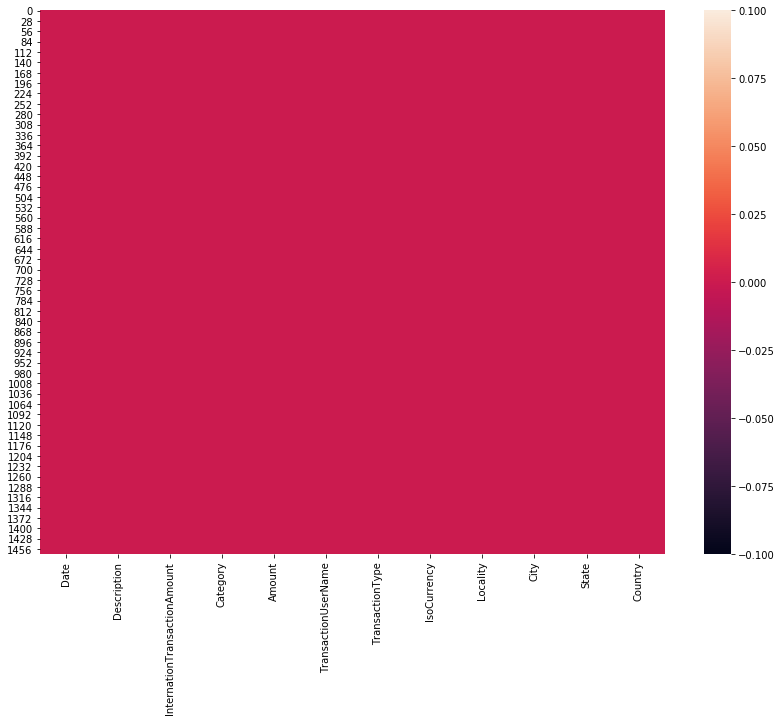

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [27]:
df.Amount

0        -127
1        -499
2        -388
3        -108
4         -50
        ...  
1465     -120
1466    -1798
1467     -298
1468    -1852
1469    -1297
Name: Amount, Length: 1470, dtype: object

In [28]:
l = [pd.to_numeric(i,errors='coerce') for i in df.Amount] #converting amount into numeric
df['Amount'] = l
df['Amount']=abs(df['Amount'])
df.Amount

0        127.0
1        499.0
2        388.0
3        108.0
4         50.0
         ...  
1465     120.0
1466    1798.0
1467     298.0
1468    1852.0
1469    1297.0
Name: Amount, Length: 1470, dtype: float64

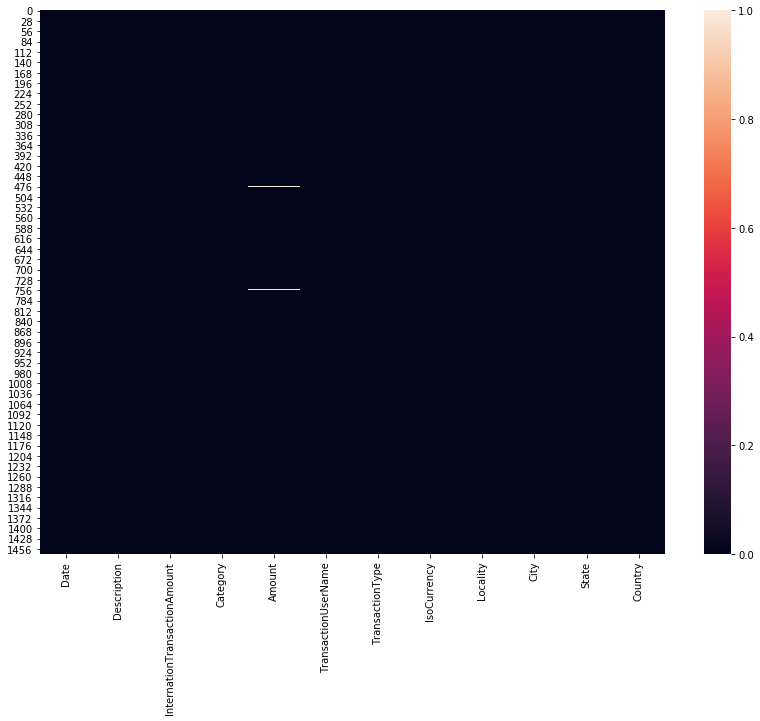

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [30]:
df.Amount.isnull().sum()

3

In [31]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLEGURGAON,0,OCCUPATION,499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSOGURGAON,0,CAFE COMPANY,388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6/7/2019,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,120.0,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,7/7/2019,SPICEJET LIMITEDGURGAON,0,AIRLINE,1798.0,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,7/7/2019,CAFE COFFEE DAYILD TRADE,0,CAFE COMPANY,298.0,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,7/7/2019,SHOPPERS STOP LTD GURGAON,0,DEPARTMENT STORE COMPANY,1852.0,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [32]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
rows_with_nan

[477, 755, 789]

In [33]:
df.iloc[[477,755,789],:]

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
477,23-02-2020,THE BREWHOUSE 2 RADISSON GURUGRAM,0,THEATRE IN TAUNTON,NaN,-2899,JASJIT KAUR,DOMESTIC,INR,BLOCK S,GURUGRAM,INDIA
755,4/8/2019,BREWER STREET GURGAON,0,STREET IN LONDON,NaN,-2348,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,INDIA
789,14-08-2019,JAI MAHAL PALACE HAWA MAHJAIPUR,0,PALACE IN JAIPUR,NaN,-2391,VIBHORE GOYAL,DOMESTIC,INR,CIVIL LINES,JAIPUR,INDIA


In [34]:
df.iloc[477, 4:11] = ['2899','JASJIT KAUR','DOMESTIC','INR','BLOCK S','GURUGRAM','HARYANA']
df.iloc[755, 4:11] = ['2348','VIBHORE GOYAL','DOMESTIC','INR','D1 BLOCK','GURUGRAM',"HARYANA"]
df.iloc[789, 4:11] = ['2391','VIBHORE GOYAL','DOMESTIC','INR','CIVIL LINES','JAIPUR','RAJASTHAN']

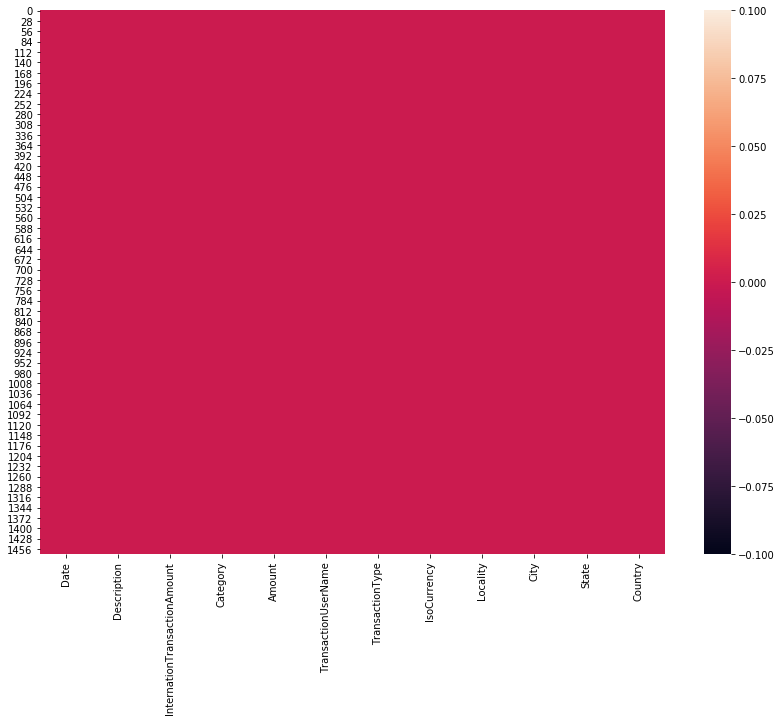

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [36]:
df.isnull().sum()

Date                            0
Description                     0
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64

In [37]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,127,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLEGURGAON,0,OCCUPATION,499,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSOGURGAON,0,CAFE COMPANY,388,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,108,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0,VIDEO GAME,50,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6/7/2019,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,120,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,7/7/2019,SPICEJET LIMITEDGURGAON,0,AIRLINE,1798,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,7/7/2019,CAFE COFFEE DAYILD TRADE,0,CAFE COMPANY,298,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,7/7/2019,SHOPPERS STOP LTD GURGAON,0,DEPARTMENT STORE COMPANY,1852,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [38]:
categoryanalysis=df.groupby('Category')['Amount'].sum().to_frame()

In [39]:
categoryanalysis

,Amount
Category,
1967 FILM,1060
1976 FILM,11614
1984 FILM,700
1988 FILM,2330
1989 FILM,2158.86
...,...
THEATRE IN TAUNTON,2899
US STATE,999
VFX COMPANY,605


In [40]:
categoryanalysis.reset_index(inplace=True)

In [41]:
cat=categoryanalysis
cat

,Category,Amount
0,1967 FILM,1060
1,1976 FILM,11614
2,1984 FILM,700
3,1988 FILM,2330
4,1989 FILM,2158.86
...,...,...
146,THEATRE IN TAUNTON,2899
147,US STATE,999
148,VFX COMPANY,605
149,VIDEO GAME,160999


In [42]:
cat['Category']=cat['Category'].str.lstrip()

In [43]:
df['Date']=pd.to_datetime(df['Date'])

In [44]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,127,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,2019-12-12,CUT AND STYLEGURGAON,0,OCCUPATION,499,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,2019-12-12,MUMUSOGURGAON,0,CAFE COMPANY,388,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,108,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,50,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2019-06-07,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,120,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,2019-07-07,SPICEJET LIMITEDGURGAON,0,AIRLINE,1798,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,2019-07-07,CAFE COFFEE DAYILD TRADE,0,CAFE COMPANY,298,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,2019-07-07,SHOPPERS STOP LTD GURGAON,0,DEPARTMENT STORE COMPANY,1852,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [45]:
dd=df.sort_values('Date',ascending=False)

In [46]:
dd.T

,419,418,417,421,420,629,560,559,558,557,...,388,390,389,170,171,172,173,174,175,118
Date,2020-12-02 00:00:00,2020-12-02 00:00:00,2020-12-02 00:00:00,2020-12-02 00:00:00,2020-12-02 00:00:00,2020-11-03 00:00:00,2020-11-03 00:00:00,2020-11-03 00:00:00,2020-11-03 00:00:00,2020-11-03 00:00:00,...,2019-01-03 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-02 00:00:00,2018-12-27 00:00:00
Description,PLANET NEEDSGURGAON,NETFLIX ENTERTAINMENT SGURGAON,UBER INR MUMBAI,THE ROOM GURGAON,HILTON GARDEN INN GURGGURGAON,HOUSE OF CANDY ALWAR,ORIENTAL TRES ALWAR F15BEHROR,CAFE COFFEE DAYALANKAR PL,PETRO SURCHARGE WAIVER,SAINIK FILLING STATION GURGAON,...,B S FUELSGURGAON,B S FUELSGURGAON,PETRO SURCHARGE WAIVER,CUT AND STYLE GURGAON,S AND S BEAUTY CAREGURGAON,MAKEMYTRIP INDIA PVT LTNEW DELHI,KFC SEC 47 SOHNA ROAD GGURGAON,CARNIVAL FILMS PVT LTDGURGAON,MAKEMYTRIP INDIA PVT LTNEW DELHI,WWW.ALIBABA.COM LONDONUSD
InternationTransactionAmount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
Category,CAFE COMPANY,PRODUCTION COMPANY,ONLINE FOOD ORDERING COMPANY,VIDEO GAME,HOTEL BRAND,FASHION COMPANY,CAFE COMPANY,CAFE COMPANY,CORPORATION,1993 FILM,...,AMERICAN ACTRESS,AMERICAN ACTRESS,CORPORATION,OCCUPATION,RETAIL COMPANY,COMPANY,FAST FOOD RESTAURANT COMPANY,CINEMA COMPANY,COMPANY,E-COMMERCE COMPANY
Amount,953,199,107.68,50,1326.97,1524,37,140,17,1717,...,1998.76,14.84,19.79,1820,330,48635,265,2000,57215,2532.86
TransactionUserName,JASJIT KAUR,VIBHORE GOYAL,VIBHORE GOYAL,INDU GOYAL,JASJIT KAUR,INDU GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,...,JASJIT KAUR,VIBHORE GOYAL,JASJIT KAUR,JASJIT KAUR,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL,VIBHORE GOYAL
TransactionType,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,...,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,DOMESTIC,INTERNATIONAL
IsoCurrency,INR,INR,INR,INR,INR,INR,INR,INR,INR,INR,...,INR,INR,INR,INR,INR,INR,INR,INR,INR,USD
Locality,SECTOR 42,GURGAON,MUMBAI,CENTRAL PARK II,SECTOR 50,ALWAR,ALWAR,CENTRAL PARK II,CENTRAL PARK II,GURGAON,...,DERA MANDI,DERA MANDI,CENTRAL PARK II,SECTOR 4,MOUNT VERNON,BLOCK 11,D1 BLOCK,GURGAON,BLOCK 11,CENTRAL PARK II
City,GURUGRAM,GURUGRAM,MUMBAI,GURUGRAM,GURUGRAM,ALWAR,ALWAR,GURUGRAM,GURUGRAM,GURUGRAM,...,NEW DELHI,NEW DELHI,GURUGRAM,GURUGRAM,ALEXANDRIA,NEW DELHI,GURUGRAM,GURUGRAM,NEW DELHI,GURUGRAM


In [47]:
df.TransactionUserName=df.TransactionUserName.str.lstrip()

In [48]:
df['TransactionUserName'].value_counts().index

Index(['JASJIT KAUR', 'VIBHORE GOYAL', 'INDU GOYAL'], dtype='object')

In [49]:
new={'VIBHORE GOYAL':'0','JASJIT KAUR':'1','INDU GOYAL':2}

In [50]:
df.TransactionUserName=df.TransactionUserName.map(new)

In [51]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,127,0,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,2019-12-12,CUT AND STYLEGURGAON,0,OCCUPATION,499,1,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,2019-12-12,MUMUSOGURGAON,0,CAFE COMPANY,388,1,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,108,0,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,2019-12-12,THE ROOM GURGAON,0,VIDEO GAME,50,0,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2019-06-07,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,120,0,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,2019-07-07,SPICEJET LIMITEDGURGAON,0,AIRLINE,1798,0,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,2019-07-07,CAFE COFFEE DAYILD TRADE,0,CAFE COMPANY,298,0,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,2019-07-07,SHOPPERS STOP LTD GURGAON,0,DEPARTMENT STORE COMPANY,1852,1,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [52]:
grouplist=list(df['Category'].unique())

In [53]:
grouplist

['VIDEO GAME',
 'OCCUPATION',
 'CAFE COMPANY',
 'CITY IN INDIA',
 'NEW YORK CITY BOROUGH',
 'PLANTS',
 'HOTEL BRAND',
 'ELECTRONICS RETAIL COMPANY',
 'RIDESHARING COMPANY',
 '1988 FILM',
 'COMPANY',
 'INDIAN ACTRESS',
 'AMERICAN TELEVISION PROGRAM',
 'CITY IN CALIFORNIA',
 'HEALTH CARE COMPANY',
 'BAND',
 'E-COMMERCE COMPANY',
 'FICTIONAL CHARACTER',
 'RESTAURANT COMPANY',
 'CITY IN NEW YORK',
 'CINEMA COMPANY',
 'AMERICAN MINISTER',
 'AMERICAN ACTOR',
 'DISH',
 'CANADIAN MODEL',
 '2015 FILM',
 'RADIO STATION',
 'ANIMAL',
 'FAST FOOD COMPANY',
 'POLITICAL PARTY',
 'RETAIL COMPANY',
 'TELECOMMUNICATIONS COMPANY',
 'NOVEL BY JULES VERNE',
 'FORMER CHIEF MINISTER OF UTTAR PRADESH',
 'CORPORATION',
 'MASSIF IN NEPAL',
 'DOG BREED',
 'INSURANCE COMPANY',
 'ITALIAN REGION',
 'NOVEL BY JANE AUSTEN',
 'COFFEEHOUSE COMPANY',
 'EVENT',
 'FAST FOOD RESTAURANT COMPANY',
 'DEPARTMENT STORE COMPANY',
 'POEM BY TULSIDAS',
 'INDIAN RESEARCHER',
 'FOOD',
 'CLOTHING RETAIL COMPANY',
 'INTERNATIONAL AIRL

In [54]:
grouplist=[i.lower() for i in grouplist]

In [55]:
books=list(filter(lambda x: 'book' in x, grouplist))
food=list(filter(lambda x: 'food' in x, grouplist))
food3=list(filter(lambda x: 'cafe' in x, grouplist))
electronics=list(filter(lambda x: 'electronics' in x, grouplist))
travel=list(filter(lambda x: 'town' in x, grouplist))
food2=list(filter(lambda x: 'cocktail' in x, grouplist))

In [56]:
novel=list(filter(lambda x: 'novel' in x, grouplist))
entertainment=list(filter(lambda x: 'film' in x, grouplist))
mod=list(filter(lambda x: 'model' in x, grouplist))
mod2=list(filter(lambda x: 'actress' in x, grouplist))
mod3=list(filter(lambda x: 'series' in x, grouplist))
mod4=list(filter(lambda x: 'song' in x, grouplist))
mod5=list(filter(lambda x: 'sport' in x, grouplist))

In [57]:
df.filter(items=['Date', 'Category', 'Amount'])

,Date,Category,Amount
0,2019-12-12,VIDEO GAME,127
1,2019-12-12,OCCUPATION,499
2,2019-12-12,CAFE COMPANY,388
3,2019-12-12,VIDEO GAME,108
4,2019-12-12,VIDEO GAME,50
...,...,...,...
1465,2019-06-07,FAST FOOD RESTAURANT COMPANY,120
1466,2019-07-07,AIRLINE,1798
1467,2019-07-07,CAFE COMPANY,298
1468,2019-07-07,DEPARTMENT STORE COMPANY,1852


## Food Bill Last Month

In [58]:
fd = df['Category'].str.contains('FOOD')
afd = df.loc[fd, 'Category']
aa=afd.keys()
fdd=df.loc[df['Amount'].index.isin(aa)]
fdd

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
105,2020-04-01,MCDONALDS GURGAON,0,FAST FOOD COMPANY,604.8,1,DOMESTIC,INR,BLOCK S,GURUGRAM,HARYANA,INDIA
173,2019-01-02,KFC SEC 47 SOHNA ROAD GGURGAON,0,FAST FOOD RESTAURANT COMPANY,265,0,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
182,2019-03-02,RAZ*PIZZA HUT,0,FOOD,438.9,0,DOMESTIC,INR,INR,GURUGRAM,HARYANA,INDIA
221,2020-01-16,UBER GURGAON,0,ONLINE FOOD ORDERING COMPANY,1,0,DOMESTIC,INR,ACHARYA PURI EXTENSION,GURUGRAM,HARYANA,INDIA
222,2020-01-16,UBER GURGAON,0,ONLINE FOOD ORDERING COMPANY,1,0,DOMESTIC,INR,ACHARYA PURI EXTENSION,GURUGRAM,HARYANA,INDIA
243,2020-01-22,MC DONALDS MUMBAI,0,FAST FOOD COMPANY,386.01,2,DOMESTIC,INR,HAJI ALI,MUMBAI,MAHARASHTRA,INDIA
248,2020-01-23,UBER INR MUMBAI,0,ONLINE FOOD ORDERING COMPANY,94.11,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA
249,2020-01-23,UBER INRMUMBAI,0,ONLINE FOOD ORDERING COMPANY,67.84,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA
256,2020-01-24,UBER INRMUMBAI,0,ONLINE FOOD ORDERING COMPANY,20,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA
270,2020-01-28,UBER INRMUMBAI,0,ONLINE FOOD ORDERING COMPANY,137.87,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA


In [59]:
start_date = "2020-04-07"
end_date = "2020-03-07"



In [60]:
date=fdd.loc[(fdd["Date"] <= start_date) & (fdd["Date"] >= end_date)]

In [61]:
date

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
105,2020-04-01,MCDONALDS GURGAON,0,FAST FOOD COMPANY,604.8,1,DOMESTIC,INR,BLOCK S,GURUGRAM,HARYANA,INDIA
307,2020-04-02,UBER INRMUMBAI,0,ONLINE FOOD ORDERING COMPANY,397.62,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA


In [62]:
dt=date.Amount.astype(float).sum()
dt

1002.42

In [63]:
print("My food bill of last month is :", dt)
print("Transaction statement of",start_date, "to",end_date,"is given below:")
date

My food bill of last month is : 1002.42
Transaction statement of 2020-04-07 to 2020-03-07 is given below:


,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
105,2020-04-01,MCDONALDS GURGAON,0,FAST FOOD COMPANY,604.8,1,DOMESTIC,INR,BLOCK S,GURUGRAM,HARYANA,INDIA
307,2020-04-02,UBER INRMUMBAI,0,ONLINE FOOD ORDERING COMPANY,397.62,0,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA


## Comparison my monthly travel over past three month of the date range

In [64]:
start_date = "2020-04-07"
end_date = "2020-03-07"
end3_date="2020-01-07"



In [65]:
tr = df[df['Category'].str.contains('AIRLINE')]


In [66]:
tr

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
194,2019-07-02,JET AIRWAYS INDIA LTD MUMBAI,0,INTERNATIONAL AIRLINE,2000,0,DOMESTIC,INR,ASHOK NAGAR,MUMBAI,MAHARASHTRA,INDIA
195,2019-07-02,JET AIRWAYS INDIA LTD MUMBAI,0,INTERNATIONAL AIRLINE,1298,0,DOMESTIC,INR,ASHOK NAGAR,MUMBAI,MAHARASHTRA,INDIA
332,2019-02-13,JET AIRWAYS INDIA LTD MUMBAI,0,INTERNATIONAL AIRLINE,2000,0,DOMESTIC,INR,ASHOK NAGAR,MUMBAI,MAHARASHTRA,INDIA
461,2020-02-21,AIRASIA INDIA NEW DELHI,0,AIRLINE,350,2,DOMESTIC,INR,NEW DELHI,NEW DELHI,DELHI,INDIA
495,2020-02-27,TATA SIA AIRLINES MUMBAI,0,AIRLINE,2500,2,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA
983,2019-12-10,INDIGO GURGAON,0,AIRLINE,250,0,DOMESTIC,INR,SIKANDERPUR,GURUGRAM,HARYANA,INDIA
1466,2019-07-07,SPICEJET LIMITEDGURGAON,0,AIRLINE,1798,0,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA


In [67]:
date1=tr.loc[(tr["Date"] <= start_date) & (tr["Date"] >= end_date)]
date2=tr.loc[(tr["Date"] <= start_date) & (tr["Date"] >= end3_date)]


In [68]:
date1

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country


In [69]:
date2

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
461,2020-02-21,AIRASIA INDIA NEW DELHI,0,AIRLINE,350,2,DOMESTIC,INR,NEW DELHI,NEW DELHI,DELHI,INDIA
495,2020-02-27,TATA SIA AIRLINES MUMBAI,0,AIRLINE,2500,2,DOMESTIC,INR,MUMBAI,MUMBAI,MAHARASHTRA,INDIA


In [70]:
date1.groupby('Date')['Amount'].sum()

Series([], Name: Amount, dtype: float64)

In [71]:
d1=date1.Amount.astype(float).sum()
d1

0.0

In [72]:
date2.groupby('Date')['Amount'].sum()


Date
2020-02-21     350.0
2020-02-27    2500.0
Name: Amount, dtype: float64

In [73]:
d2=date2.Amount.astype(float).sum()
d2

2850.0

In [74]:
print("Comparison my monthly travel over past three month of the date range provided in the statement is :\n",d2-d1)

Comparison my monthly travel over past three month of the date range provided in the statement is :
 2850.0


## save clean and error free data

In [76]:
df.to_csv('Finaldata.csv')

In [77]:
# tc=df.groupby(['TransactionUserName','Category']).count()

# Manage Categorical data

In [91]:
df['Category'] = pd.factorize(df.Category)[0]
df['TransactionType'] = pd.factorize(df.TransactionType)[0]
df['City'] = pd.factorize(df.City)[0]
df['State'] = pd.factorize(df.State)[0]
df['Country'] = pd.factorize(df.Country)[0]
df['IsoCurrency'] = pd.factorize(df.IsoCurrency)[0]
df['Description'] = pd.factorize(df.Description)[0]
df['Locality'] = pd.factorize(df.Locality)[0]

In [92]:
df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,2019-12-12,0,0,0,127,0,0,0,0,0,0,0
1,2019-12-12,1,0,1,499,1,0,0,1,0,0,0
2,2019-12-12,2,0,2,388,1,0,0,2,0,0,0
3,2019-12-12,0,0,0,108,0,0,0,0,0,0,0
4,2019-12-12,0,0,0,50,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2019-06-07,89,0,42,120,0,0,0,52,0,0,0
1466,2019-07-07,492,0,79,1798,0,0,0,115,0,0,0
1467,2019-07-07,93,0,2,298,0,0,0,54,0,0,0
1468,2019-07-07,90,0,43,1852,1,0,0,18,0,0,0
